<a href="https://colab.research.google.com/github/stevearonson/VB-Video-Tracking/blob/master/Detectron2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 7.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=98bf0bf5915099bfc01c81e83ea41a51108eb710e03c2afdb678f7875c8797d0
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [33]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 676kB/s 
     |████████████████████████████████| 2.2MB 7.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20210128-cp36-none-any.whl size=41550 sha256=12937e5f73848bc2984fd19b5ddfa66d20ff85dcce14d5b08761b8a9c10008f2
  Stored in directory: /root/.cache/pip/wheels/2e/2e/1b/c208cf351dc8ccefa6e483df7d2cb287b2b06727f650b2361d
  Created wheel for iopath: filename=iopath-0.1.3-cp36-none-any.whl size=11169 sha256=bf5d7ec88b01e45cca4bc3740e553900b7d3048697e66b2a9d840b49a9c75e97
  Stored in directory: /root/.cache/pip/wheels/a9/1d/55/94a55e032409ac7617f9cbb88a0fa2cf4e7208806c29730804
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0

In [1]:
!git clone https://github.com/facebookresearch/detectron2

fatal: destination path 'detectron2' already exists and is not an empty directory.


In [8]:
!ls detectron2/configs/COCO-InstanceSegmentation/

mask_rcnn_R_101_C4_3x.yaml   mask_rcnn_R_50_DC5_3x.yaml
mask_rcnn_R_101_DC5_3x.yaml  mask_rcnn_R_50_FPN_1x_giou.yaml
mask_rcnn_R_101_FPN_3x.yaml  mask_rcnn_R_50_FPN_1x.yaml
mask_rcnn_R_50_C4_1x.yaml    mask_rcnn_R_50_FPN_3x.yaml
mask_rcnn_R_50_C4_3x.yaml    mask_rcnn_X_101_32x8d_FPN_3x.yaml
mask_rcnn_R_50_DC5_1x.yaml


In [24]:
!wget https://github.com/stevearonson/VB-Video-Tracking/blob/master/file6c69adff7a0.jpg -q -O input.jpg

In [27]:
from google.colab import files
uploaded = files.upload()

Saving file6c69adff7a0.jpg to file6c69adff7a0.jpg


In [3]:
!ls -ls

total 188
 4 drwxr-xr-x 15 root root  4096 Feb  2 21:39 detectron2
88 -rw-r--r--  1 root root 89301 Feb  2 22:26 file6c69adff7a0.jpg
92 -rw-r--r--  1 root root 92967 Feb  2 22:24 input.jpg
 4 drwxr-xr-x  1 root root  4096 Feb  1 17:27 sample_data


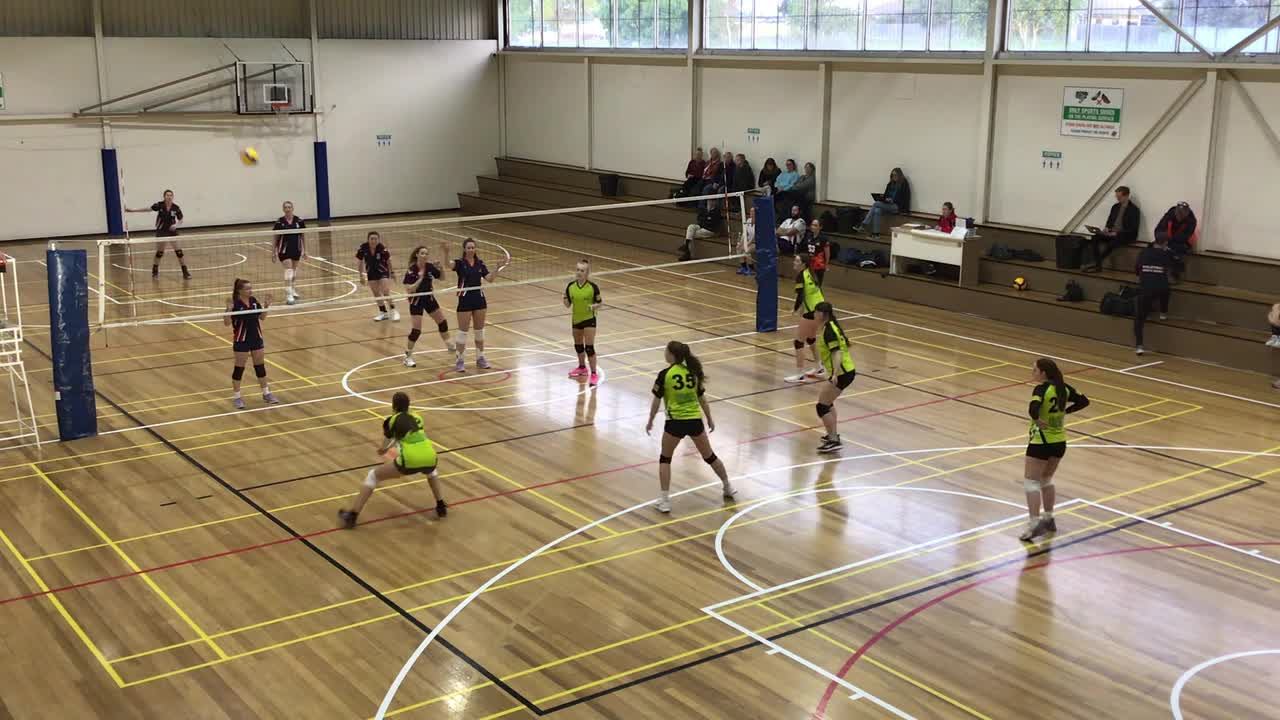

In [4]:
import os, json, cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
im = cv2.imread("./file6c69adff7a0.jpg")
cv2_imshow(im)

In [16]:
#!apt install python3-opencv  # the one pre-installed have some issues

!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
    --input file6c69adff7a0.jpg \
    --output test.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/02 22:45:27 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=['file6c69adff7a0.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='test.jpg', video_input=None, webcam=False)
[02/02 22:45:32 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
[02/02 22:45:32 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/p

In [17]:
!ls -ls

total 732
  4 drwxr-xr-x 15 root root   4096 Feb  2 21:39 detectron2
312 -rw-r--r--  1 root root 317007 Feb  2 22:44 file6c69adff7a0.jpg
 92 -rw-r--r--  1 root root  92967 Feb  2 22:24 input.jpg
  4 drwxr-xr-x  1 root root   4096 Feb  1 17:27 sample_data
320 -rw-r--r--  1 root root 325885 Feb  2 22:45 test.jpg


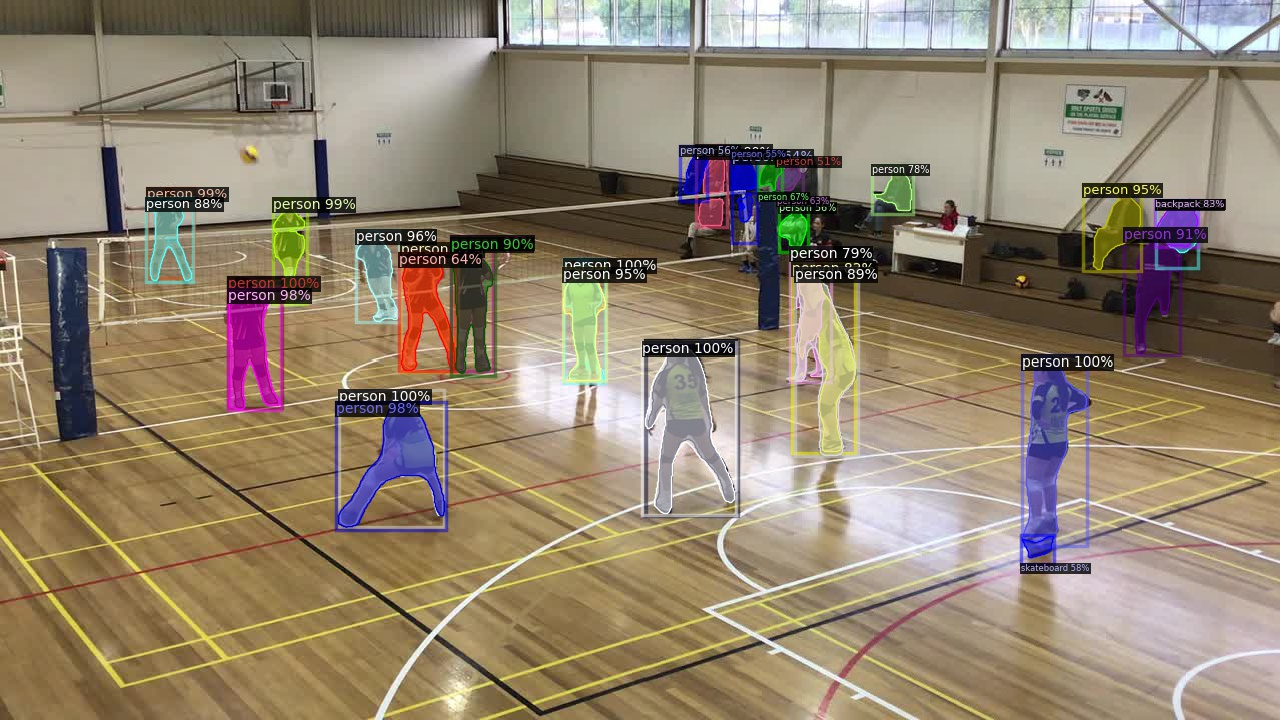

In [18]:
im = cv2.imread("./test.jpg")
cv2_imshow(im)